<a href="https://colab.research.google.com/github/Soorajb19/StockMarket/blob/main/STOCKMARKET_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [33]:
import yfinance as yf
import pandas as pd

# Fetch NIFTY 50 data
nifty = yf.Ticker("^NSEI")

# Get historical data
nifty_data = nifty.history(period="max")  # Fetch all available data

# Display the first few rows
print(nifty_data.head())


                                  Open         High          Low        Close  \
Date                                                                            
2007-09-17 00:00:00+05:30  4518.450195  4549.049805  4482.850098  4494.649902   
2007-09-18 00:00:00+05:30  4494.100098  4551.799805  4481.549805  4546.200195   
2007-09-19 00:00:00+05:30  4550.250000  4739.000000  4550.250000  4732.350098   
2007-09-20 00:00:00+05:30  4734.850098  4760.850098  4721.149902  4747.549805   
2007-09-21 00:00:00+05:30  4752.950195  4855.700195  4733.700195  4837.549805   

                           Volume  Dividends  Stock Splits  
Date                                                        
2007-09-17 00:00:00+05:30       0        0.0           0.0  
2007-09-18 00:00:00+05:30       0        0.0           0.0  
2007-09-19 00:00:00+05:30       0        0.0           0.0  
2007-09-20 00:00:00+05:30       0        0.0           0.0  
2007-09-21 00:00:00+05:30       0        0.0           0.0  


In [34]:
nifty_data.index

DatetimeIndex(['2007-09-17 00:00:00+05:30', '2007-09-18 00:00:00+05:30',
               '2007-09-19 00:00:00+05:30', '2007-09-20 00:00:00+05:30',
               '2007-09-21 00:00:00+05:30', '2007-09-24 00:00:00+05:30',
               '2007-09-25 00:00:00+05:30', '2007-09-26 00:00:00+05:30',
               '2007-09-27 00:00:00+05:30', '2007-09-28 00:00:00+05:30',
               ...
               '2025-01-10 00:00:00+05:30', '2025-01-13 00:00:00+05:30',
               '2025-01-14 00:00:00+05:30', '2025-01-15 00:00:00+05:30',
               '2025-01-16 00:00:00+05:30', '2025-01-17 00:00:00+05:30',
               '2025-01-20 00:00:00+05:30', '2025-01-21 00:00:00+05:30',
               '2025-01-22 00:00:00+05:30', '2025-01-23 00:00:00+05:30'],
              dtype='datetime64[ns, Asia/Kolkata]', name='Date', length=4255, freq=None)

<Axes: xlabel='Date'>

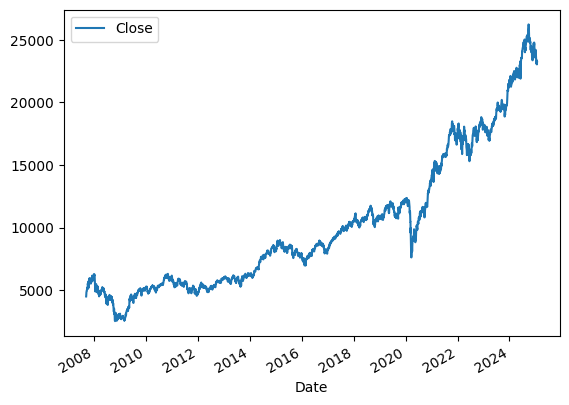

In [35]:
nifty_data.plot.line(y="Close", use_index=True)

In [36]:
del nifty_data["Dividends"]
del nifty_data["Stock Splits"]

In [37]:
nifty_data["Tomorrow"] = nifty_data["Close"].shift(-1)

In [38]:
nifty_data

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,4546.200195
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,4732.350098
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,4747.549805
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,4837.549805
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,4932.200195
...,...,...,...,...,...,...
2025-01-17 00:00:00+05:30,23277.099609,23292.099609,23100.349609,23203.199219,272900,23344.750000
2025-01-20 00:00:00+05:30,23290.400391,23391.099609,23170.650391,23344.750000,301500,23024.650391
2025-01-21 00:00:00+05:30,23421.650391,23426.300781,22976.849609,23024.650391,312900,23155.349609


In [39]:
nifty_data["Target"] = (nifty_data["Tomorrow"] > nifty_data["Close"]).astype(int)

In [40]:
nifty_data

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2007-09-17 00:00:00+05:30,4518.450195,4549.049805,4482.850098,4494.649902,0,4546.200195,1
2007-09-18 00:00:00+05:30,4494.100098,4551.799805,4481.549805,4546.200195,0,4732.350098,1
2007-09-19 00:00:00+05:30,4550.250000,4739.000000,4550.250000,4732.350098,0,4747.549805,1
2007-09-20 00:00:00+05:30,4734.850098,4760.850098,4721.149902,4747.549805,0,4837.549805,1
2007-09-21 00:00:00+05:30,4752.950195,4855.700195,4733.700195,4837.549805,0,4932.200195,1
...,...,...,...,...,...,...,...
2025-01-17 00:00:00+05:30,23277.099609,23292.099609,23100.349609,23203.199219,272900,23344.750000,1
2025-01-20 00:00:00+05:30,23290.400391,23391.099609,23170.650391,23344.750000,301500,23024.650391,0
2025-01-21 00:00:00+05:30,23421.650391,23426.300781,22976.849609,23024.650391,312900,23155.349609,1


In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
train = nifty_data.iloc[:-100]
test = nifty_data.iloc[-100:]
predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [43]:
from sklearn.metrics import precision_score
pred = model.predict(test[predictors])


In [44]:
pred = pd.Series(pred, index=test.index)

In [45]:
precision_score(test["Target"], pred)

0.4329896907216495

In [47]:
actvpred = pd.concat([test["Target"], pred], axis=1)

<Axes: xlabel='Date'>

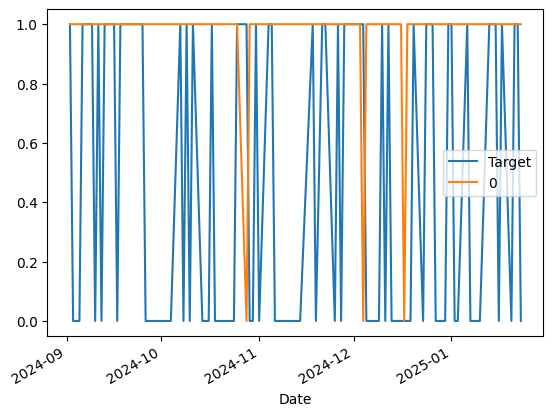

In [48]:
actvpred.plot()

In [53]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  pred = model.predict(test[predictors])
  pred = pd.Series(pred, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], pred], axis=1)
  return combined


In [54]:
def backtest(data, model, predictors, start=2500, step=250):
  all_predictions = []

  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)

In [55]:
predictions = backtest(nifty_data, model, predictors)

In [58]:
predictions["Predictions"].value_counts()

,count
Predictions,
1,996
0,759


In [59]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5391566265060241

In [60]:
predictions["Target"].value_counts() / predictions.shape[0]

,count
Target,
1,0.547578
0,0.452422


In [63]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
  rolling_averages = nifty_data.rolling(horizon).mean()

  ratio_column = f"Close_Ratio_{horizon}"
  nifty_data[ratio_column] = nifty_data["Close"] / rolling_averages["Close"]

  trend_column = f"Trend_{horizon}"
  nifty_data[trend_column] = nifty_data.shift(1).rolling(horizon).sum()["Target"]

  new_predictors += [ratio_column, trend_column]



In [65]:
nifty_data = nifty_data.dropna()

In [66]:
nifty_data

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Close_Ratio_5,Close_Ratio_60,Close_Ratio_250,Close_Ratio_1000,Trend_2,Trend_5,Trend_60,Trend_250,Trend_1000
Date,,,,,,,,,,,,,,,,,
2011-10-13 00:00:00+05:30,5130.799805,5136.950195,5067.649902,5077.850098,0,5132.299805,1,0.997883,1.014789,0.992330,0.911365,1.042939,1.0,3.0,23.0,111.0,510.0
2011-10-14 00:00:00+05:30,5057.350098,5141.399902,5056.600098,5132.299805,0,5118.250000,0,1.005333,1.015754,1.004393,0.921801,1.053995,1.0,3.0,24.0,111.0,510.0
2011-10-17 00:00:00+05:30,5156.200195,5160.200195,5084.500000,5118.250000,0,5037.500000,0,0.998629,1.007444,1.003264,0.919921,1.051026,1.0,2.0,23.0,111.0,509.0
2011-10-18 00:00:00+05:30,5049.450195,5057.500000,5011.049805,5037.500000,0,5139.149902,1,0.992049,0.989091,0.989147,0.906187,1.034383,0.0,2.0,23.0,110.0,508.0
2011-10-19 00:00:00+05:30,5080.450195,5148.049805,5075.299805,5139.149902,0,5091.899902,0,1.009989,1.007477,1.010438,0.925163,1.055190,1.0,2.0,24.0,111.0,508.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-16 00:00:00+05:30,23377.250000,23391.650391,23272.050781,23311.800781,299400,23203.199219,0,1.002119,1.002930,0.970104,0.989600,1.229636,2.0,3.0,25.0,136.0,544.0
2025-01-17 00:00:00+05:30,23277.099609,23292.099609,23100.349609,23203.199219,272900,23344.750000,1,0.997665,1.000222,0.966435,0.984729,1.223312,1.0,3.0,25.0,135.0,544.0
2025-01-20 00:00:00+05:30,23290.400391,23391.099609,23170.650391,23344.750000,301500,23024.650391,0,1.003041,1.004084,0.973068,0.990493,1.230170,1.0,4.0,26.0,135.0,544.0


In [67]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)


In [74]:
def predict(train, test, predictors, model):
  model.fit(train[predictors], train["Target"])
  pred = model.predict_proba(test[predictors])[:,1]
  pred [pred >= .6] = 1
  pred [pred < .6] = 0
  pred = pd.Series(pred, index=test.index, name="Predictions")
  combined = pd.concat([test["Target"], pred], axis=1)
  return combined


In [75]:
predict = backtest(nifty_data, model, new_predictors)

In [76]:
predictions["Predictions"].value_counts()

,count
Predictions,
1,996
0,759


In [77]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5391566265060241

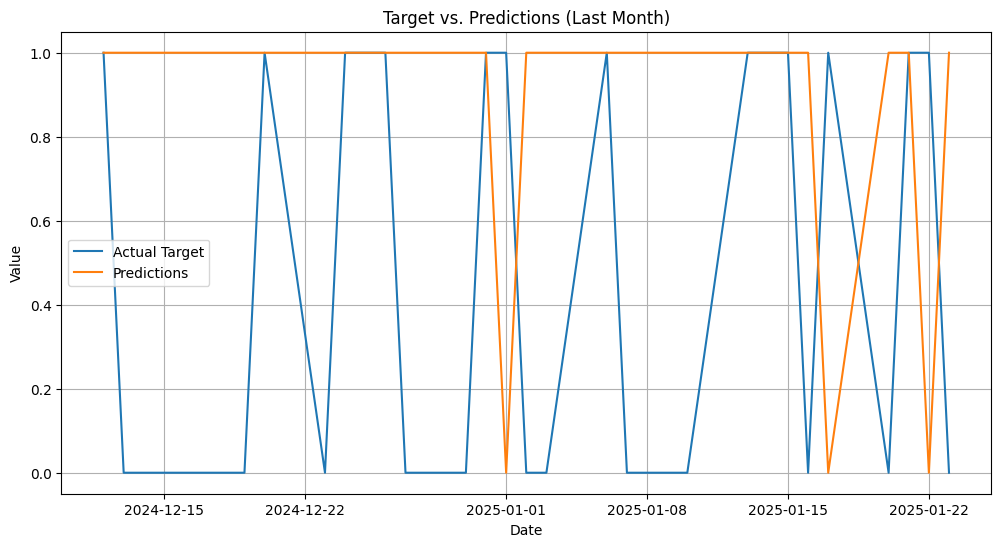

In [80]:
# Extract the last month's data
last_month_data = predictions.tail(30)  # Assuming 30 days in a month

# Plot the target and predictions
plt.figure(figsize=(12, 6))
plt.plot(last_month_data.index, last_month_data["Target"], label="Actual Target")
plt.plot(last_month_data.index, last_month_data["Predictions"], label="Predictions")
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Target vs. Predictions (Last Month)")
plt.legend()
plt.grid(True)
plt.show()